In [50]:
import pandahouse as ph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
import plotly.express as px
import numpy as np
from scipy.stats import iqr

In [2]:
df = pd.read_csv('conversion.csv')

In [3]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [18]:
df.interest.unique()

array([ 15,  16,  20,  28,  29,  27,  31,   7,  30,  24,  21,  32,  18,
        63,  65,  25,  10,  19,  26,  36,  23,  64,  22,   2,  66, 100,
       101, 102, 103, 105, 107, 110, 111, 112, 113, 108, 109, 114, 104,
       106])

In [28]:
df1 = df.groupby('fb_campaign_id', as_index=False).sum()

In [29]:
df1 

,fb_campaign_id,ad_id,xyz_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,103916,708746,916,15,7350,1,1.430000,2,1
1,103917,708749,916,16,17861,2,1.820000,2,0
2,103920,708771,916,20,693,0,0.000000,1,0
3,103928,1417633,1832,56,8392,2,2.540000,2,1
4,103929,708820,916,29,1915,0,0.000000,1,1
...,...,...,...,...,...,...,...,...,...
686,179977,1314410,1178,109,1129773,252,358.189997,13,2
687,179978,1314411,1178,110,637549,120,173.880003,3,0
688,179979,1314412,1178,111,151531,28,40.289999,2,0
689,179981,1314414,1178,113,790253,135,198.710000,8,2


In [31]:
df1.Impressions = np.log(df1.Impressions)

In [32]:
df1

,fb_campaign_id,ad_id,xyz_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,103916,708746,916,15,8.902456,1,1.430000,2,1
1,103917,708749,916,16,9.790375,2,1.820000,2,0
2,103920,708771,916,20,6.541030,0,0.000000,1,0
3,103928,1417633,1832,56,9.035034,2,2.540000,2,1
4,103929,708820,916,29,7.557473,0,0.000000,1,1
...,...,...,...,...,...,...,...,...,...
686,179977,1314410,1178,109,13.937527,252,358.189997,13,2
687,179978,1314411,1178,110,13.365386,120,173.880003,3,0
688,179979,1314412,1178,111,11.928546,28,40.289999,2,0
689,179981,1314414,1178,113,13.580108,135,198.710000,8,2


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


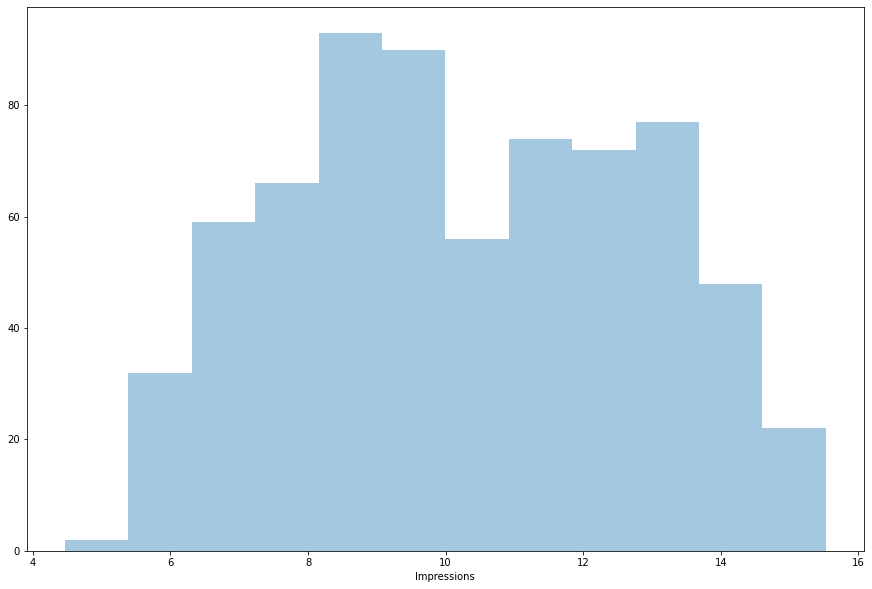

In [33]:
plt.figure(figsize=(15, 10))
sns.distplot(df1.Impressions, kde = False)

In [38]:
df['CTR'] = df.Clicks.div(df.Impressions)

In [39]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171


In [43]:
df2 = df.query('xyz_campaign_id == 916')

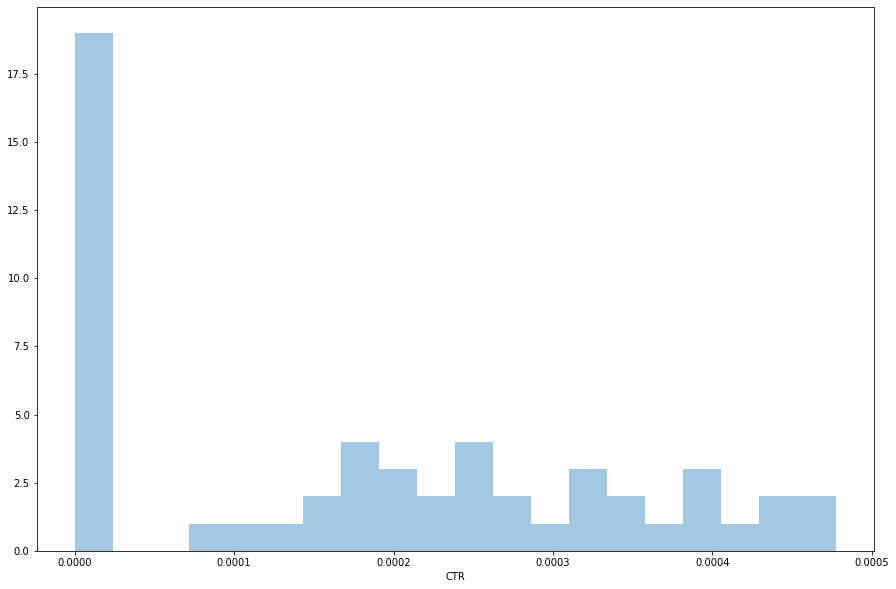

In [46]:
plt.figure(figsize=(15, 10))
sns.distplot(df2.CTR, kde = False, bins = 20)

In [48]:
df['CPC'] = df.Spent.div(df.Clicks)

In [49]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171,1.471926


In [52]:
iqr(df.CPC ,nan_policy='omit')

0.25436369905

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


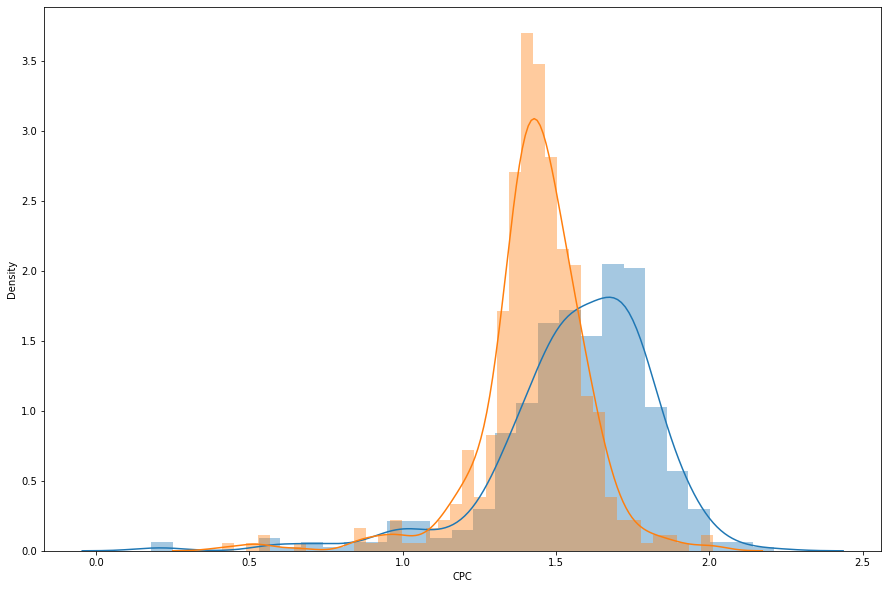

In [62]:
plt.figure(figsize=(15, 10))
sns.distplot(df.query('gender == "M"').dropna().CPC)
sns.distplot(df.query('gender == "F"').dropna().CPC)

In [63]:
df['CR'] = df.Approved_Conversion.div(df.Clicks)

In [65]:
df.query('ad_id == "1121814"')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,0.030879
